# Ex00 Line chart

In [20]:
import pandas as pd
import sqlite3

In [21]:
con = sqlite3.connect("../data/checking-logs.sqlite")
cur = con.cursor()

In [22]:
pd.read_sql("SELECT * FROM pageviews",con)

,index,uid,datetime
0,0,admin_1,2020-04-17 12:01:08.463179
1,1,admin_1,2020-04-17 12:01:23.743946
2,2,admin_3,2020-04-17 12:17:39.287778
3,3,admin_3,2020-04-17 12:17:40.001768
4,4,admin_1,2020-04-17 12:27:30.646665
...,...,...,...
1075,1075,user_25,2020-05-21 23:23:49.995349
1076,1076,admin_1,2020-05-21 23:49:22.386789
1077,1077,admin_1,2020-05-22 10:36:14.662600
1078,1078,user_5,2020-05-22 11:30:18.368990


In [23]:
data = pd.read_sql("""
                SELECT datetime FROM pageviews
                WHERE uid LIKE 'user%'
            """, 
            con, parse_dates='datetime')
data

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [24]:
data['date'] = data.datetime.dt.date

In [25]:
views_dates_counts = data.groupby(data.date).date.count()
views_dates_counts

date
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2
Name: date, dtype: int64

In [26]:
views_dates_counts.info()

<class 'pandas.core.series.Series'>
Index: 33 entries, 2020-04-17 to 2020-05-22
Series name: date
Non-Null Count  Dtype
--------------  -----
33 non-null     int64
dtypes: int64(1)
memory usage: 1.6+ KB


<Axes: title={'center': 'Просмотры в день'}, xlabel='date'>

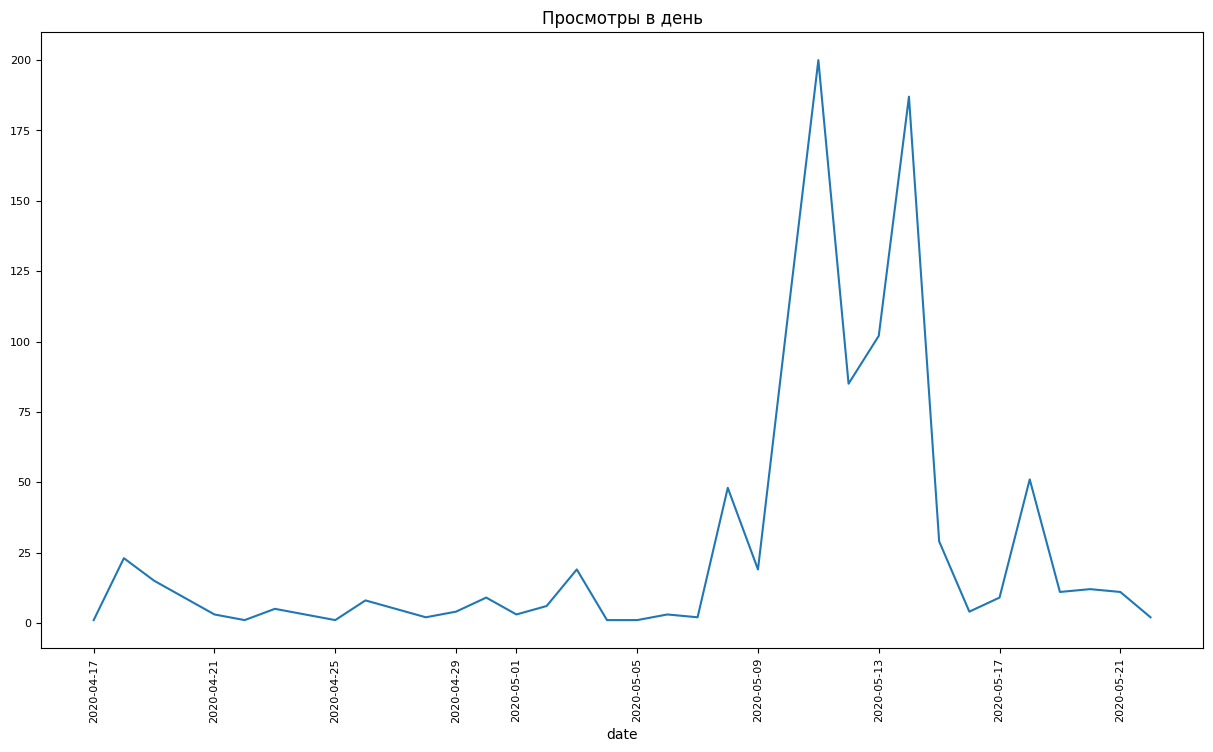

In [27]:

views_dates_counts.plot(title = 'Просмотры в день', fontsize = 8, figsize=(15,8),rot=90)


In [28]:
cur.close()